### Trying Out Gradient Boosting Algorithms

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

import xgboost as xgb

%matplotlib inline

In [10]:
df = pd.read_csv('nyc-rolling-sales-clean-1.csv', sep=';')
df.head()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
0,2400,1552,1930,2,220485,10900
1,2742,1207,1925,2,223372,8100
2,5610,1320,1910,5,362981,19000
3,1758,1537,1910,5,245135,9700
4,1317,1339,1920,4,216477,12800


In [11]:
df.describe()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,2645.676976,1639.773196,1938.378007,5.374570,287247.257732,18346.735395
std,1353.765596,810.233323,27.953929,2.892423,105082.283757,9435.111314
min,353.000000,450.000000,1901.000000,1.000000,78522.000000,4300.000000
25%,1900.000000,1114.000000,1920.000000,3.000000,216482.500000,10750.000000
50%,2446.000000,1400.000000,1930.000000,5.000000,281208.000000,17300.000000
75%,3000.000000,1960.000000,1950.000000,8.000000,332174.500000,24550.000000
max,14384.000000,5303.000000,2015.000000,10.000000,961748.000000,81400.000000


###### Defining features and targets

In [17]:
X = df.drop(['SALE_PRICE', 'YEARLY_RENT'], axis=1).values
y = df[['SALE_PRICE','YEARLY_RENT']].values
X.shape

(291, 4)

###### Splitting into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###### We will use an sklearn multioutput wrapper for our xgboost model

In [50]:
model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear', n_estimators=20, reg_alpha=0.5))

In [51]:
#fitting the model
model.fit(X_train, y_train)

[02:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[02:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ckris\Anaconda3\lib\site-packages\xgboost\core.py:383: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=20, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:linear',
                                            random

###### Prediction and evaluation of performance

In [52]:
predictions = model.predict(X_test)

#R2 score:
print("R2 score: ", model.score(X_test, y_test))

#Mean-squared error
print("MSE: ", np.mean((predictions-y_test)**2))

R2 score:  0.8414995968398787
MSE:  729208753.4471263


In [53]:
len(np.arange(len(X_test)))

97

X_Test size:  97
Residuals size:  97


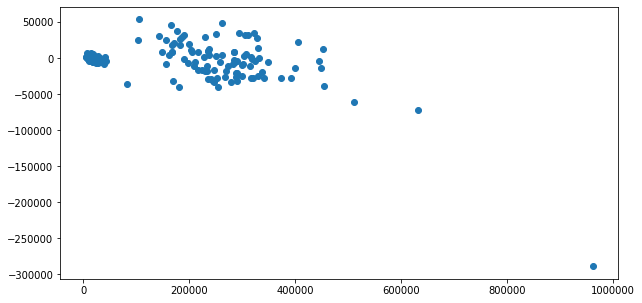

In [54]:
#plotting residuals
residuals = predictions - y_test
plt.figure(figsize=(10,5))

print("X_Test size: ", len(X_test))
print("Residuals size: ", len(residuals))

plt.scatter(y_test, residuals)